# On the Prediction of Software Defects for Embedded Real-time Systems

# Multilayer perceptron

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

# Loading the data from the Pickle files

In [2]:
with open('x_train.pkl', 'rb') as f:
    x_train = pickle.load(f)

with open('x_test.pkl', 'rb') as f:
    x_test = pickle.load(f)

with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('x_traincm1.pkl', 'rb') as f:
    x_traincm1 = pickle.load(f)

with open('x_testcm1.pkl', 'rb') as f:
    x_testcm1 = pickle.load(f)

with open('y_traincm1.pkl', 'rb') as f:
    y_traincm1 = pickle.load(f)

with open('y_testcm1.pkl', 'rb') as f:
    y_testcm1 = pickle.load(f)
    
with open('x_trainjm1.pkl', 'rb') as f:
    x_trainjm1 = pickle.load(f)

with open('x_testjm1.pkl', 'rb') as f:
    x_testjm1 = pickle.load(f)

with open('y_trainjm1.pkl', 'rb') as f:
    y_trainjm1 = pickle.load(f)

with open('y_testjm1.pkl', 'rb') as f:
    y_testjm1 = pickle.load(f)
    
with open('x_trainkc1.pkl', 'rb') as f:
    x_trainkc1 = pickle.load(f)

with open('x_testkc1.pkl', 'rb') as f:
    x_testkc1 = pickle.load(f)

with open('y_trainkc1.pkl', 'rb') as f:
    y_trainkc1 = pickle.load(f)

with open('y_testkc1.pkl', 'rb') as f:
    y_testkc1 = pickle.load(f)
    
with open('x_trainkc2.pkl', 'rb') as f:
    x_trainkc2 = pickle.load(f)

with open('x_testkc2.pkl', 'rb') as f:
    x_testkc2 = pickle.load(f)

with open('y_trainkc2.pkl', 'rb') as f:
    y_trainkc2 = pickle.load(f)

with open('y_testkc2.pkl', 'rb') as f:
    y_testkc2 = pickle.load(f)
    
with open('x_trainpc1.pkl', 'rb') as f:
    x_trainpc1 = pickle.load(f)

with open('x_testpc1.pkl', 'rb') as f:
    x_testpc1 = pickle.load(f)

with open('y_trainpc1.pkl', 'rb') as f:
    y_trainpc1 = pickle.load(f)

with open('y_testpc1.pkl', 'rb') as f:
    y_testpc1 = pickle.load(f)
    
with open('y_train_before1.pkl', 'rb') as f:
    y_train_before = pickle.load(f)

with open('y_test_before1.pkl', 'rb') as f:
    y_test_before = pickle.load(f)
    
    
    
with open('y_train_before1cm1.pkl', 'rb') as f:
    y_train_beforecm1 = pickle.load(f)

with open('y_test_before1cm1.pkl', 'rb') as f:
    y_test_beforecm1 = pickle.load(f)
    
with open('y_train_before1jm1.pkl', 'rb') as f:
    y_train_beforejm1 = pickle.load(f)

with open('y_test_before1jm1.pkl', 'rb') as f:
    y_test_beforejm1 = pickle.load(f)
    
with open('y_train_before1kc1.pkl', 'rb') as f:
    y_train_beforekc1 = pickle.load(f)

with open('y_test_before1kc1.pkl', 'rb') as f:
    y_test_beforekc1 = pickle.load(f)
    
with open('y_train_before1kc2.pkl', 'rb') as f:
    y_train_beforekc2 = pickle.load(f)

with open('y_test_before1kc2.pkl', 'rb') as f:
    y_test_beforekc2 = pickle.load(f)
    
with open('y_train_before1pc1.pkl', 'rb') as f:
    y_train_beforepc1 = pickle.load(f)

with open('y_test_before1pc1.pkl', 'rb') as f:
    y_test_beforepc1 = pickle.load(f)

# Creating a two layer perceptron based neural network

In [3]:
def network_architecture(x, hid1_size, hid2_size):
    '''
    Creates a 2-layer perceptron based on hidden sizes
    '''
    # Input layer -> Hidden layer
    W1 = tf.Variable(tf.random_normal([21, hid1_size]), trainable=True, name = 'W1')
    # Hidden layer -> Output layer
    W2 = tf.Variable(tf.random_normal([hid1_size, hid2_size]), trainable=True, name = 'W2')
    
    #l1= tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    #l1 = tf.nn.relu(l1)

    # Hidden layer
    hid_out1 = tf.matmul(x, W1)
    hid_out2 = tf.nn.bias_add(hid_out1, tf.constant(1, dtype=tf.float32, shape=[hid1_size]), name='Bias1')
    #hid_out = tf.nn.sigmoid(hid_out2)
    hid_out = tf.nn.relu(hid_out2)

    # Output Layer
    out1 = tf.matmul(hid_out, W2)
    out2 = tf.nn.bias_add(out1, tf.constant(1, dtype=tf.float32, shape=[hid2_size]), name='Bias2')
    out  = out2 
    
    return out

In [4]:
# def neural_network_model(data):
    
#     hidden_1_layer = { 'weights' : tf.Variable(tf.random_normal([784, n_nodes_hl1])),
#                        'biases' : tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
#     hidden_2_layer = { 'weights' : tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
#                        'biases' : tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
#     hidden_3_layer = { 'weights' : tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
#     #                   'biases' : tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
#     output_layer = { 'weights' : tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
#                        'biases' : tf.Variable(tf.random_normal([n_classes]))}
    
#     l1= tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
#     l1 = tf.nn.relu(l1)
    
#     l2= tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
#     l2 = tf.nn.relu(l2)
    
#     l3= tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
#     l3 = tf.nn.relu(l3)
    
#     output= tf.matmul(l3, output_layer['weights'])+ output_layer['biases']
    
#     return output
    

# Tunning Hyper-parameters

In [5]:
## Hyperparameters
l_rate        = 1e-2
epochs        = 500
batch_size    = 700
hidden1_size  = 20
hidden2_size  = 2

# Training two layer perceptron based neural network

In [6]:
# Input Placeholders 
x = tf.placeholder(tf.float32, [None, 21])
y = tf.placeholder(tf.float32, [None, 2]) 

# Create network
y_ = network_architecture(x, hidden1_size, hidden2_size)

In [7]:
# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 

# Optimization algorithm
optimizer = tf.train.GradientDescentOptimizer(l_rate)
train = optimizer.minimize(cross_entropy)

optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)

# Initializer
init_op = tf.global_variables_initializer()

# Accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Two-layer perceptron based neural network for all the data

In [8]:
print('Training_Set...Overall: ', len(x_train))
print('Testing_Set....Overall: ', len(x_test))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_train), batch_size):
            batch_x = x_train[batch:(batch+batch_size)]
            batch_y = y_train[batch:(batch+batch_size)]
            
            _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for Overall test batch is', sess.run(accuracy, feed_dict={x: x_test, y: y_test}))
    
sess.close()

Training_Set...Overall:  12098
Testing_Set....Overall:  3025

Training Done!
The accuracy for Overall test batch is 0.817851


# Plotting the training loss for overall project using two-layer perceptron    

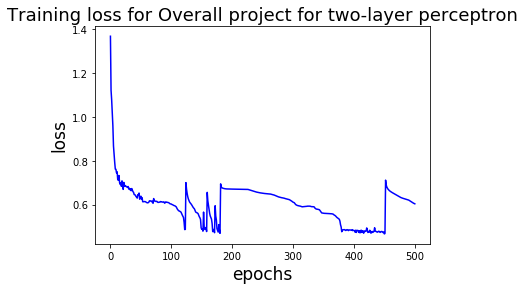

In [9]:
ax = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(ax, cost, color='b')
plt.title('Training loss for Overall project for two-layer perceptron', fontsize=18)
plt.xlabel('epochs',fontsize=17)
plt.ylabel('loss',fontsize=17)
f.savefig("TwoLayerPerceptronTrainingLossOverall25.pdf", bbox_inches='tight')

# Two-layer perceptron based neural network for CM1

In [10]:
print('Training_Set: ', len(x_traincm1))
print('Testing_Set : ', len(x_testcm1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_traincm1), batch_size):
            batch_x = x_traincm1[batch:(batch+batch_size)]
            batch_y = y_traincm1[batch:(batch+batch_size)]
            
            _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for CM1 test batch is   ', sess.run(accuracy, feed_dict={x: x_testcm1, y: y_testcm1}))
    
sess.close()

Training_Set:  398
Testing_Set :  100

Training Done!
The accuracy for CM1 test batch is    0.85


# Plotting the training loss for CM1 using two-layer perceptron  

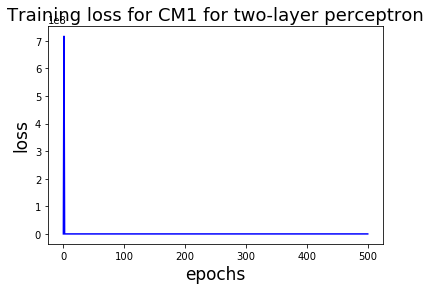

In [11]:
ax = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(ax, cost, color='b')
plt.title('Training loss for CM1 for two-layer perceptron', fontsize=18)
plt.xlabel('epochs',fontsize=17)
plt.ylabel('loss',fontsize=17)
f.savefig("TwoLayerPerceptronTrainingLossCM125.pdf", bbox_inches='tight')

# Two-layer perceptron based neural network for JM1

In [12]:
print('Training_Set: ', len(x_trainjm1))
print('Testing_Set : ', len(x_testjm1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainjm1), batch_size):
            batch_x = x_trainjm1[batch:(batch+batch_size)]
            batch_y = y_trainjm1[batch:(batch+batch_size)]
            
            _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for JM1 test batch is   ', sess.run(accuracy, feed_dict={x: x_testjm1, y: y_testjm1}))
    
sess.close()

Training_Set:  8708
Testing_Set :  2177

Training Done!
The accuracy for JM1 test batch is    0.789159


# Plotting Training loss for JM1 using two-layer perceptron

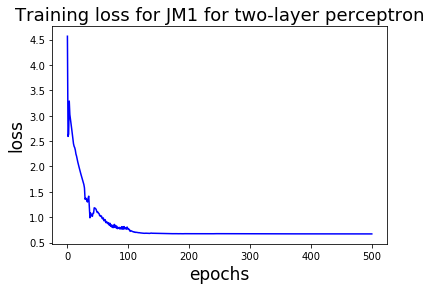

In [13]:
ax = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(ax, cost, color='b')
plt.title('Training loss for JM1 for two-layer perceptron', fontsize=18)
plt.xlabel('epochs',fontsize=17)
plt.ylabel('loss',fontsize=17)
f.savefig("TwoLayerPerceptronTrainingLossJM125.pdf", bbox_inches='tight')

# Two-layer perceptron based neural network for KC1

In [14]:
print('Training_Set: ', len(x_trainkc1))
print('Testing_Set : ', len(x_testkc1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainkc1), batch_size):
            batch_x = x_trainkc1[batch:(batch+batch_size)]
            batch_y = y_trainkc1[batch:(batch+batch_size)]
            
            _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for KC1 test batch is   ', sess.run(accuracy, feed_dict={x: x_testkc1, y: y_testkc1}))
    
sess.close()

Training_Set:  1687
Testing_Set :  422

Training Done!
The accuracy for KC1 test batch is    0.841232


# Plotting Training loss for KC1 using two-layer perceptron

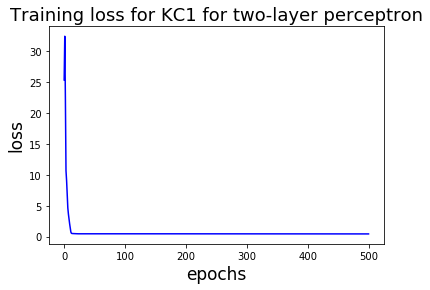

In [15]:
ax = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(ax, cost, color='b')
plt.title('Training loss for KC1 for two-layer perceptron', fontsize=18)
plt.xlabel('epochs',fontsize=17)
plt.ylabel('loss',fontsize=17)
f.savefig("TwoLayerPerceptronTrainingLossKC125.pdf", bbox_inches='tight')

# Two-layer perceptron based neural network for KC2

In [16]:
print('Training_Set: ', len(x_trainkc2))
print('Testing_Set : ', len(x_testkc2))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainkc2), batch_size):
            batch_x = x_trainkc2[batch:(batch+batch_size)]
            batch_y = y_trainkc2[batch:(batch+batch_size)]
            
            _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for KC2 test batch is   ', sess.run(accuracy, feed_dict={x: x_testkc2, y: y_testkc2}))
    
sess.close()

Training_Set:  417
Testing_Set :  105

Training Done!
The accuracy for KC2 test batch is    0.790476


# Plotting Training loss for KC2 using two-layer perceptron

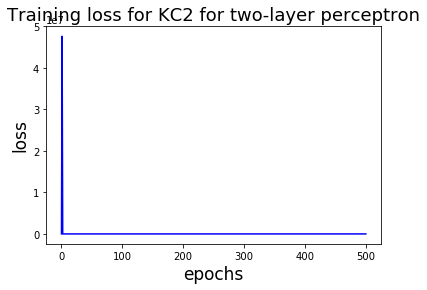

In [17]:
ax = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(ax, cost, color='b')
plt.title('Training loss for KC2 for two-layer perceptron', fontsize=18)
plt.xlabel('epochs',fontsize=17)
plt.ylabel('loss',fontsize=17)
f.savefig("TwoLayerPerceptronTrainingLossKC225.pdf", bbox_inches='tight')

# Two-layer perceptron based neural network for PC1

In [18]:
print('Training_Set: ', len(x_trainpc1))
print('Testing_Set : ', len(x_testpc1))

cost = []

with tf.Session() as sess: 
    sess.run(init_op)
    for epoch in range(epochs):
        #x_train, y_train = shuffle_in_unison(x_train, y_train)
        for batch in range(0, len(x_trainpc1), batch_size):
            batch_x = x_trainpc1[batch:(batch+batch_size)]
            batch_y = y_trainpc1[batch:(batch+batch_size)]
            
            _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
        
        cost.append(loss)
    
    print("\nTraining Done!")
    print('The accuracy for PC1 test batch is   ', sess.run(accuracy, feed_dict={x: x_testpc1, y: y_testpc1}))
    
sess.close()

Training_Set:  887
Testing_Set :  222

Training Done!
The accuracy for PC1 test batch is    0.932432


# Plotting Training loss for PC1 using two-layer perceptron

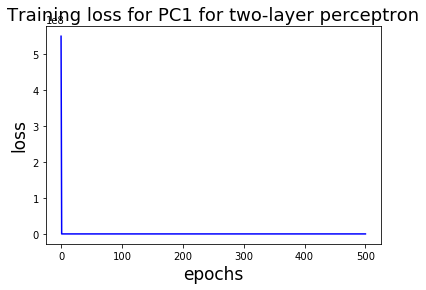

In [19]:
ax = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(ax, cost, color='b')
plt.title('Training loss for PC1 for two-layer perceptron', fontsize=18)
plt.xlabel('epochs',fontsize=17)
plt.ylabel('loss',fontsize=17)
f.savefig("TwoLayerPerceptronTrainingLossPC125.pdf", bbox_inches='tight')

# Changing Hidden layer size and checking Accuracy for Overall data

In [20]:
# Delete any previous sessions
del sess

In [21]:
layer_size_cost = {}

for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(cross_entropy)
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_train), batch_size):
                batch_x = x_train[batch:(batch+batch_size)]
                batch_y = y_train[batch:(batch+batch_size)]

                _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})
                
            cost.append(loss)

        print("\nTraining Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_test, y: y_test})
        print('The accuracy for our test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc
    
    # Delete previous session
    del sess

Current Hidden Layer Size: 3

Training Done!
The accuracy for our test batch is:  0.816859
Current Hidden Layer Size: 4

Training Done!
The accuracy for our test batch is:  0.815868
Current Hidden Layer Size: 5

Training Done!
The accuracy for our test batch is:  0.816859
Current Hidden Layer Size: 6

Training Done!
The accuracy for our test batch is:  0.815207
Current Hidden Layer Size: 7

Training Done!
The accuracy for our test batch is:  0.816529
Current Hidden Layer Size: 8

Training Done!
The accuracy for our test batch is:  0.816859
Current Hidden Layer Size: 9

Training Done!
The accuracy for our test batch is:  0.816529
Current Hidden Layer Size: 10

Training Done!
The accuracy for our test batch is:  0.815537
Current Hidden Layer Size: 11

Training Done!
The accuracy for our test batch is:  0.815207
Current Hidden Layer Size: 12

Training Done!
The accuracy for our test batch is:  0.815537
Current Hidden Layer Size: 13

Training Done!
The accuracy for our test batch is:  0.81

# Plot Accuracy-vs-Hidden Layer Increments for Overall Data

In [22]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

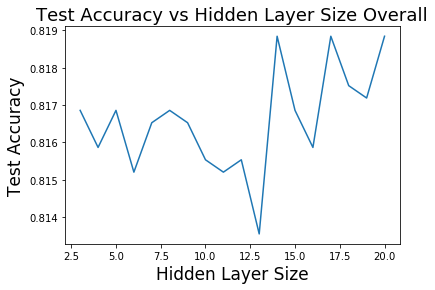

In [23]:
ax = np.floor(np.linspace(3, 20, 18))
f = plt.figure()
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size Overall', fontsize=18)
plt.xlabel('Hidden Layer Size',fontsize=17)
plt.ylabel('Test Accuracy',fontsize=17)
f.savefig("MultiLayerPerceptronTestAccuracyOverall25.pdf", bbox_inches='tight')

# Plot Training error vs Epoch for Overall

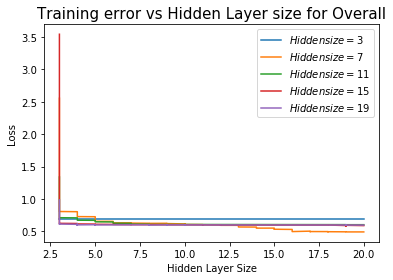

In [24]:
ax = np.floor(np.linspace(3, 20, epochs))
f = plt.figure()
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Hidden Layer size for Overall', fontsize=15)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Loss')
f.savefig("MultiLayerPerceptronTrainingErrorOverall.pdf", bbox_inches='tight')

# Changing Hidden layer size and checking Accuracy for CM1

In [25]:
# Delete any previous sessions
#del sess

In [26]:
layer_size_cost = {}


for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(cross_entropy)
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_traincm1), batch_size):
                batch_x = x_traincm1[batch:(batch+batch_size)]
                batch_y = y_traincm1[batch:(batch+batch_size)]

                _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

            cost.append(loss)

        print("\nTraining Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_testcm1, y: y_testcm1})
        print('The accuracy for CM1 test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

    # Delete previous session
    del sess

Current Hidden Layer Size: 3

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 4

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 5

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 6

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 7

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 8

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 9

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 10

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 11

Training Done!
The accuracy for CM1 test batch is:  0.84
Current Hidden Layer Size: 12

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 13

Training Done!
The accuracy for CM1 test batch is:  0.85
Current Hidden Layer Size: 14

Training

# Plot Accuracy-vs-Hidden Layer Increments for CM1

In [27]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

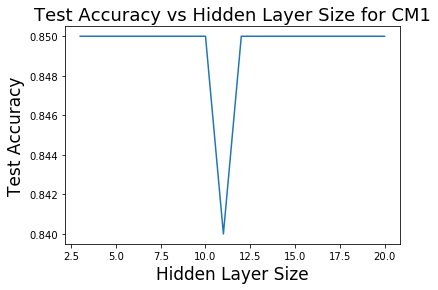

In [28]:
ax = np.floor(np.linspace(3, 20, 18))
f = plt.figure()
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size for CM1', fontsize=18)
plt.xlabel('Hidden Layer Size',fontsize=17)
plt.ylabel('Test Accuracy',fontsize=17)
f.savefig("MultiLayerPerceptronTestAccuracyCM125.pdf", bbox_inches='tight')

# Plot Training error vs Epoch for CM1

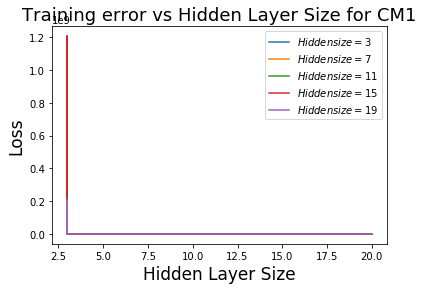

In [29]:
ax = np.floor(np.linspace(3, 20, epochs))
f = plt.figure()
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Hidden Layer Size for CM1', fontsize=18)
plt.xlabel('Hidden Layer Size', fontsize=17)
plt.ylabel('Loss', fontsize=17)
f.savefig("MultiLayerPerceptronTrainingErrorCM1.pdf", bbox_inches='tight')

# Changing Hidden layer size and checking Accuracy for JM1

In [30]:
# Delete any previous sessions
#del sess

In [31]:
layer_size_cost = {}


for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(cross_entropy)
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_trainjm1), batch_size):
                batch_x = x_trainjm1[batch:(batch+batch_size)]
                batch_y = y_trainjm1[batch:(batch+batch_size)]

                _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

            cost.append(loss)

        print("\nTraining Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_testjm1, y: y_testjm1})
        print('The accuracy for our test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

    # Delete previous session
    del sess

Current Hidden Layer Size: 3

Training Done!
The accuracy for our test batch is:  0.759302
Current Hidden Layer Size: 4

Training Done!
The accuracy for our test batch is:  0.807993
Current Hidden Layer Size: 5

Training Done!
The accuracy for our test batch is:  0.775379
Current Hidden Layer Size: 6

Training Done!
The accuracy for our test batch is:  0.807993
Current Hidden Layer Size: 7

Training Done!
The accuracy for our test batch is:  0.7887
Current Hidden Layer Size: 8

Training Done!
The accuracy for our test batch is:  0.772623
Current Hidden Layer Size: 9

Training Done!
The accuracy for our test batch is:  0.796968
Current Hidden Layer Size: 10

Training Done!
The accuracy for our test batch is:  0.807993
Current Hidden Layer Size: 11

Training Done!
The accuracy for our test batch is:  0.789159
Current Hidden Layer Size: 12

Training Done!
The accuracy for our test batch is:  0.789159
Current Hidden Layer Size: 13

Training Done!
The accuracy for our test batch is:  0.7620

# Plot Accuracy-vs-Hidden Layer Increments for JM1

In [32]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

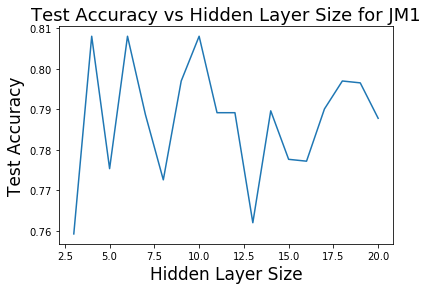

In [33]:
ax = np.floor(np.linspace(3, 20, 18))
f = plt.figure()
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size for JM1', fontsize=18)
plt.xlabel('Hidden Layer Size',fontsize=17)
plt.ylabel('Test Accuracy',fontsize=17)
f.savefig("MultiLayerPerceptronTestAccuracyJM125.pdf", bbox_inches='tight')

# Plot Training error vs Epoch for JM1

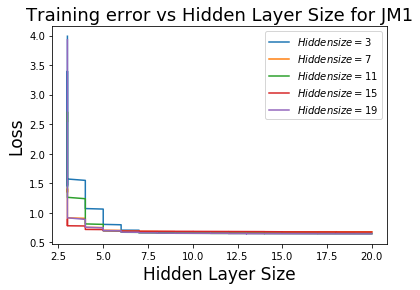

In [34]:
ax = np.floor(np.linspace(3, 20, epochs))
f = plt.figure()
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Hidden Layer Size for JM1', fontsize=18)
plt.xlabel('Hidden Layer Size', fontsize=17)
plt.ylabel('Loss', fontsize=17)
f.savefig("MultiLayerPerceptronTrainingErrorJM1.pdf", bbox_inches='tight')

# Changing Hidden layer size and checking Accuracy for KC1

In [35]:
# Delete any previous sessions
#del sess

In [36]:
layer_size_cost = {}


for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(cross_entropy)
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_trainkc1), batch_size):
                batch_x = x_trainkc1[batch:(batch+batch_size)]
                batch_y = y_trainkc1[batch:(batch+batch_size)]

                _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

            cost.append(loss)

        print("\nTraining Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_testkc1, y: y_testkc1})
        print('The accuracy for our test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

    # Delete previous session
    del sess

Current Hidden Layer Size: 3

Training Done!
The accuracy for our test batch is:  0.843602
Current Hidden Layer Size: 4

Training Done!
The accuracy for our test batch is:  0.843602
Current Hidden Layer Size: 5

Training Done!
The accuracy for our test batch is:  0.843602
Current Hidden Layer Size: 6

Training Done!
The accuracy for our test batch is:  0.836493
Current Hidden Layer Size: 7

Training Done!
The accuracy for our test batch is:  0.845972
Current Hidden Layer Size: 8

Training Done!
The accuracy for our test batch is:  0.843602
Current Hidden Layer Size: 9

Training Done!
The accuracy for our test batch is:  0.845972
Current Hidden Layer Size: 10

Training Done!
The accuracy for our test batch is:  0.834123
Current Hidden Layer Size: 11

Training Done!
The accuracy for our test batch is:  0.843602
Current Hidden Layer Size: 12

Training Done!
The accuracy for our test batch is:  0.843602
Current Hidden Layer Size: 13

Training Done!
The accuracy for our test batch is:  0.83

# Plot Accuracy-vs-Hidden Layer Increments for KC1

In [37]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

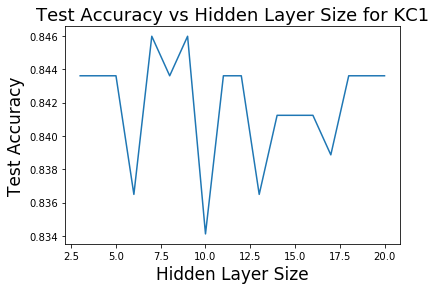

In [38]:
ax = np.floor(np.linspace(3, 20, 18))
f = plt.figure()
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size for KC1', fontsize=18)
plt.xlabel('Hidden Layer Size',fontsize=17)
plt.ylabel('Test Accuracy',fontsize=17)
f.savefig("MultiLayerPerceptronTestAccuracyKC125.pdf", bbox_inches='tight')

# Plot Training error vs Epoch for KC1

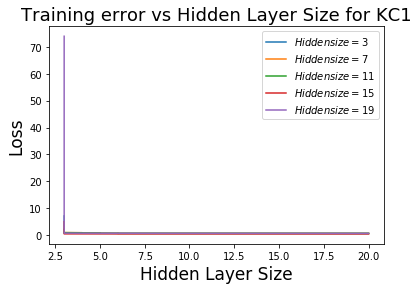

In [39]:
ax = np.floor(np.linspace(3, 20, epochs))
f = plt.figure()
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Hidden Layer Size for KC1', fontsize=18)
plt.xlabel('Hidden Layer Size', fontsize=17)
plt.ylabel('Loss', fontsize=17)
f.savefig("MultiLayerPerceptronTrainingErrorKC1.pdf", bbox_inches='tight')

# Changing Hidden layer size and checking Accuracy for KC2

In [40]:
# Delete any previous sessions
#del sess

In [41]:
layer_size_cost = {}


for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(cross_entropy)
    
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_trainkc2), batch_size):
                batch_x = x_trainkc2[batch:(batch+batch_size)]
                batch_y = y_trainkc2[batch:(batch+batch_size)]

                _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

            cost.append(loss)

        print("\nTraining Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_testkc2, y: y_testkc2})
        print('The accuracy for our test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

    # Delete previous session
    del sess

Current Hidden Layer Size: 3

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 4

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 5

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 6

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 7

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 8

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 9

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 10

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 11

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 12

Training Done!
The accuracy for our test batch is:  0.790476
Current Hidden Layer Size: 13

Training Done!
The accuracy for our test batch is:  0.79

# Plot Accuracy-vs-Hidden Layer Increments for KC2

In [42]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

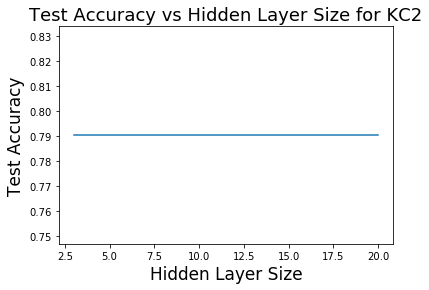

In [43]:
ax = np.floor(np.linspace(3, 20, 18))
f = plt.figure()
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size for KC2', fontsize=18)
plt.xlabel('Hidden Layer Size',fontsize=17)
plt.ylabel('Test Accuracy',fontsize=17)
f.savefig("MultiLayerPerceptronTestAccuracyKC225.pdf", bbox_inches='tight')

# Plot Training error vs Epoch for KC2

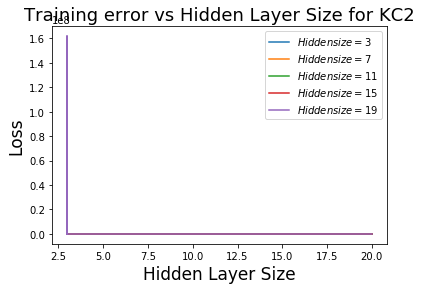

In [44]:
ax = np.floor(np.linspace(3, 20, epochs))
f = plt.figure()
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Hidden Layer Size for KC2', fontsize=18)
plt.xlabel('Hidden Layer Size', fontsize=17)
plt.ylabel('Loss', fontsize=17)
f.savefig("MultiLayerPerceptronTrainingErrorKC2.pdf", bbox_inches='tight')

# Changing Hidden layer size and checking Accuracy for PC1

In [45]:
# Delete any previous sessions
# del sess

In [46]:
layer_size_cost = {}


for i in range(3, 21):
    print('Current Hidden Layer Size:', i)
    # Hidden layer sizes
    hidden1_size  = i
    hidden2_size  = 2

    # Input Placeholders 
    x = tf.placeholder(tf.float32, [None, 21])
    y = tf.placeholder(tf.float32, [None, 2]) 

    # Create network
    y_ = network_architecture(x, hidden1_size, hidden2_size)
    
    # Loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)) 
    
    # Optimization algorithm
    optim = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
    
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(cross_entropy)
    
    # Initializer
    init_op = tf.global_variables_initializer()
    
    # Accuracy
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Training Loss
    cost = []

    with tf.Session() as sess: 
        sess.run(init_op)
        for epoch in range(epochs):
            #x_train, y_train = shuffle_in_unison(x_train, y_train)
            for batch in range(0, len(x_trainpc1), batch_size):
                batch_x = x_trainpc1[batch:(batch+batch_size)]
                batch_y = y_trainpc1[batch:(batch+batch_size)]

                _, loss = sess.run([train, cross_entropy], feed_dict = {x : batch_x, y : batch_y})

            cost.append(loss)

        print("\nTraining Done!")
        current_hidden_size_acc = sess.run(accuracy, feed_dict={x: x_testpc1, y: y_testpc1})
        print('The accuracy for our test batch is: ', current_hidden_size_acc)

    sess.close()
    
    # Save the loss and accuracy into a dict 
    layer_size_cost[str(i)] = cost
    layer_size_cost[(str(i) + '_acc')] = current_hidden_size_acc

    # Delete previous session
    del sess

Current Hidden Layer Size: 3

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 4

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 5

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 6

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 7

Training Done!
The accuracy for our test batch is:  0.927928
Current Hidden Layer Size: 8

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 9

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 10

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 11

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 12

Training Done!
The accuracy for our test batch is:  0.932432
Current Hidden Layer Size: 13

Training Done!
The accuracy for our test batch is:  0.92

# Plot Accuracy-vs-Hidden Layer Increments for PC1

In [47]:
layer_size_vs_acc = []

for i in range(3, 21, 1):
    get_acc = str(i) + '_acc'
    layer_size_vs_acc.append(layer_size_cost[get_acc])

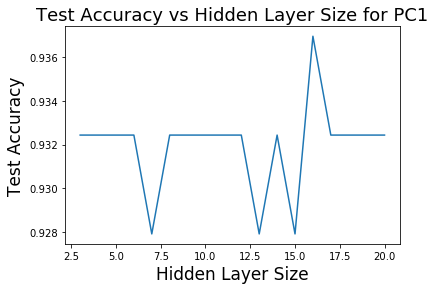

In [48]:
ax = np.floor(np.linspace(3, 20, 18))
f = plt.figure()
plt.plot(ax, layer_size_vs_acc )
plt.title('Test Accuracy vs Hidden Layer Size for PC1', fontsize=18)
plt.xlabel('Hidden Layer Size',fontsize=17)
plt.ylabel('Test Accuracy',fontsize=17)
f.savefig("MultiLayerPerceptronTestAccuracyPC125.pdf", bbox_inches='tight')

# Plot Training error vs Epoch for PC1

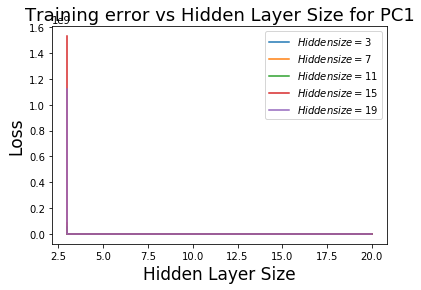

In [49]:
ax = np.floor(np.linspace(3, 20, epochs))
f = plt.figure()
for i in range(3, 20, 4):
    plt.plot(ax, layer_size_cost[str(i)], label='$Hidden size = {i}$'.format(i=i))
    
plt.legend(loc='best')
plt.title('Training error vs Hidden Layer Size for PC1', fontsize=18)
plt.xlabel('Hidden Layer Size', fontsize=17)
plt.ylabel('Loss', fontsize=17)
f.savefig("MultiLayerPerceptronTrainingErrorPC1.pdf", bbox_inches='tight')